In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
spotify = pd.read_csv('spotify.csv')
spotify['energy']

0      0.433
1      0.785
2      0.697
3      0.345
4      0.550
       ...  
295    0.945
296    0.873
297    0.878
298    0.938
299    0.944
Name: energy, Length: 300, dtype: float64

In [3]:
# Check for missing values
# Check the range of loudness values
print(spotify['loudness'].min(), spotify['loudness'].max())


-18.982 -1.673


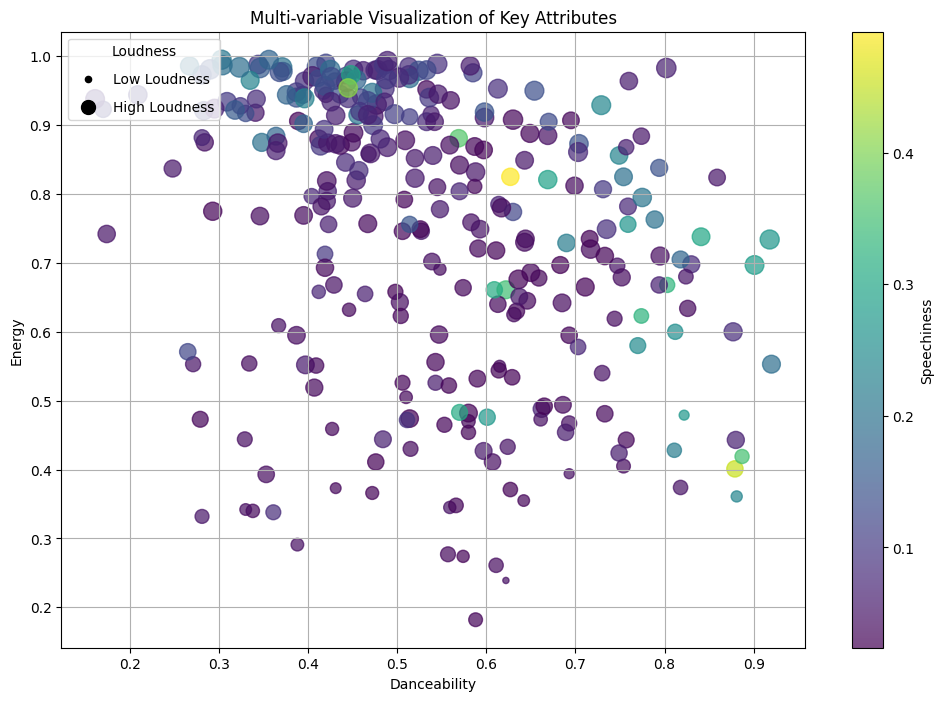

In [4]:
# Define the scaling factor for loudness
# We'll map the range [-18.982, -1.673] to [20, 200] for point sizes
# You can adjust these values as needed
size_min = 20
size_max = 200

x = spotify['danceability']
y = spotify['energy']
size = spotify['loudness'] * 5  # Adjust size based on loudness
color = spotify['speechiness']  # Color based on speechiness
alpha = 0.7  # Set transparency

# Scale the loudness values to the range [size_min, size_max]
scaled_size = ((spotify['loudness'] - spotify['loudness'].min()) / (spotify['loudness'].max() - spotify['loudness'].min())) * (size_max - size_min) + size_min

# Create the scatter plot with adjusted size
plt.figure(figsize=(12, 8))
plt.scatter(x, y, s=scaled_size, c=color, cmap='viridis', alpha=alpha)

# Add labels and title
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Multi-variable Visualization of Key Attributes')

# Add a colorbar to represent speechiness
cbar = plt.colorbar()
cbar.set_label('Speechiness')

# Add a legend for loudness
plt.scatter([], [], s=20, label='Low Loudness', color='black')
plt.scatter([], [], s=100, label='High Loudness', color='black')
plt.legend(scatterpoints=1, labelspacing=1, loc='upper left', title='Loudness')

plt.grid(True)
plt.show()


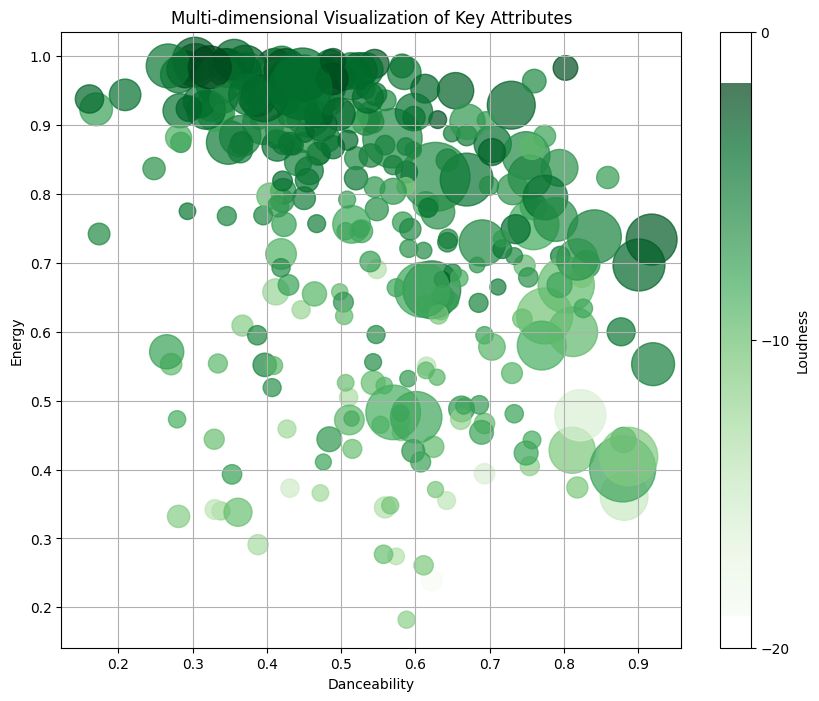

In [5]:
# Define the variables for the scatter plot
x = spotify['danceability']
y = spotify['energy']
color = spotify['loudness']
size = spotify['speechiness'] * 5000  # Adjust size based on speechiness

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x, y, c=color, cmap='Greens', s=size, alpha=0.7)

# Add labels and title
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Multi-dimensional Visualization of Key Attributes')

# Add a colorbar for loudness
cbar = plt.colorbar(scatter)
cbar.set_label('Loudness')

# Adjust colorbar ticks for better readability
cbar.set_ticks([-20, -10, 0])

plt.grid(True)
plt.show()


In [34]:
import altair as alt
import pandas as pd

# Ensure numeric columns have appropriate data types
numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
spotify[numeric_columns] = spotify[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Filter out non-numeric columns before aggregation
numeric_data = spotify.groupby('user')[numeric_columns].mean().reset_index()

# Melt the dataframe to long format for visualization
melted_data = pd.melt(numeric_data, id_vars='user', var_name='category', value_name='average_level')

# Create a dropdown selector for choosing the category
category_selector = alt.binding_select(options=numeric_columns)
category_dropdown = alt.selection_point(fields=['category'], bind=category_selector, name='Category')

# Create the bar chart
bar_chart = alt.Chart(melted_data).mark_bar().encode(
    x='user',
    y='average_level',
    color='user',
).add_params(
    category_dropdown
).transform_filter(
    category_dropdown
).properties(
    title='Average Levels of Selected Category by User',
    width=600,
    height=600
)

bar_chart.save('overall.html')

In [15]:
bar_chart

alt.Chart(...)